In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib

G = pd.read_excel("GPA.xlsx")

G.head(1)

,学年学期,课程代码,课程名称,课程类别,课程性质,学分,成绩,绩点
0,2019-2020 1,1140001,法制安全教育,文化素质教育必修,必修,0.5,94,4.0


In [2]:
Y = []
for i in G['学年学期']:
    Y.append(i.split("-")[0])
Y[1]

'2019'

In [3]:
M = []
for i in G['学年学期']:
    M.append(i.split(" ")[1])
M[1]

'1'

In [4]:
YM = []
for i in G['学年学期']:
    YM.append( \
        (i.split("-")[0] if i.split(" ")[1]=='1' else i.split("-")[1].split(' ')[0] ) \
            + ' ' + \
        ('9' if i.split(" ")[1]=='1' else '3') \
    )
YM[1]

'2019 9'

In [5]:
M = []
for i in G['课程代码']:
    M.append(i)
M[1]

2100004

In [6]:
data = [YM, M]
data = pd.DataFrame(data)
#print(data.shape)
# rows=["年月", "课程代码"]
data = data.T
data.columns=['年月', '课程代码']
print(data)

        年月     课程代码
0   2019 9  1140001
1   2019 9  2100004
2   2019 9  2100558
3   2019 9  2111292
4   2019 9  2160279
5   2019 9  2180277
6   2019 9  2180278
7   2019 9  2180279
8   2019 9  2310001
9   2019 9  4010005
10  2019 9  4080001
11  2019 9  4350001
12  2019 9  5100019
13  2019 9  5100055
14  2019 9  5100075
15  2020 3  2091046
16  2020 3  2100005
17  2020 3  2100097
18  2020 3  2111293
19  2020 3  2140231
20  2020 3  2210015
21  2020 3  2310002
22  2020 3  2440046
23  2020 3  2440049
24  2020 3  2440050
25  2020 3  5100057
26  2020 3  5100076
27  2020 9  2100075
28  2020 9  2100098
29  2020 9  2100346
30  2020 9  2100605
31  2020 9  2111140
32  2020 9  2111294
33  2020 9  2310003
34  2020 9  2440031
35  2020 9  2440072
36  2020 9  2440078
37  2020 9  2440094
38  2020 9  4010007
39  2020 9  5100078
40  2021 3  2010911
41  2021 3  2010951
42  2021 3  2100347
43  2021 3  2111295
44  2021 3  2160044
45  2021 3  2160240
46  2021 3  2310004
47  2021 3  2440045
48  2021 3  2440125


## 转换年份

In [7]:
G2 = pd.merge(data, G)
G2.head(1)

,年月,课程代码,学年学期,课程名称,课程类别,课程性质,学分,成绩,绩点
0,2019 9,1140001,2019-2020 1,法制安全教育,文化素质教育必修,必修,0.5,94,4.0


In [8]:
G2['年月'] = G2['年月'].apply(lambda x:datetime.datetime( int(x.split(' ')[0]), int(x.split(' ')[1]), 1)  )
G2.head(1)

,年月,课程代码,学年学期,课程名称,课程类别,课程性质,学分,成绩,绩点
0,2019-09-01,1140001,2019-2020 1,法制安全教育,文化素质教育必修,必修,0.5,94,4.0


## 统计成绩

### 麻烦的操作思路

In [9]:
type(G2['成绩'])
type(G2['成绩'][0])
type(G2['成绩'][4])

#G2 = G2.sort_values(by='年月')
#G2['成绩'].apply(lambda x: x.isnumeric())
#G2['成绩']
#G2

str

### 换思路

In [10]:
G3 = G2.drop( G2[ G2['成绩']=='P'].index, axis=0)
G4 = G3.drop( G2[ G2['成绩']=='NP'].index, axis=0)

G5 = G4.drop( G2[ G2['成绩']=='A'].index, axis=0)
G5.head(1)

,年月,课程代码,学年学期,课程名称,课程类别,课程性质,学分,成绩,绩点
0,2019-09-01,1140001,2019-2020 1,法制安全教育,文化素质教育必修,必修,0.5,94,4.0


### 日期有一点点迷

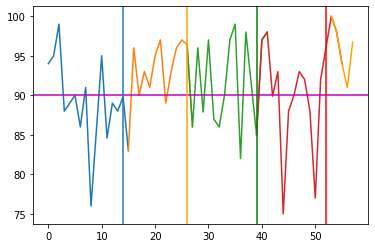

In [11]:
plt.plot(G5['成绩'][ G5[ G5['年月']=='2019-09-01'].index.min() : G5[ G5['年月']=='2020-03-01'].index.min()-1])
plt.plot(G5['成绩'][ G5[ G5['年月']=='2020-03-01'].index.min()-2 : G5[ G5['年月']=='2020-09-01'].index.min()-1])
plt.plot(G5['成绩'][ G5[ G5['年月']=='2020-09-01'].index.min()-3 : G5[ G5['年月']=='2021-03-01'].index.min()-1])
plt.plot(G5['成绩'][ G5[ G5['年月']=='2021-03-01'].index.min()-4 : G5[ G5['年月']=='2021-09-01'].index.min()-1])
plt.plot(G5['成绩'][ G5[ G5['年月']=='2021-09-01'].index.min()-4 : G5[ G5['年月']=='2021-09-01'].index.max()], color='orange')
plt.axhline(90, color='m' )
plt.axvline( G5[ G5['年月']=='2020-03-01'].index.min()-1 )
plt.axvline( G5[ G5['年月']=='2020-09-01'].index.min()-1, color='orange')
plt.axvline( G5[ G5['年月']=='2021-03-01'].index.min()-1, color='g' )
plt.axvline( G5[ G5['年月']=='2021-09-01'].index.min()-1, color='r' )


In [ ]:
G5['总成绩'] = G5.apply(lambda x: x['学分'] * x['成绩'], axis=1)
G5['总成绩'].sum() / G5['学分'].sum()

In [ ]:
G5['总绩点'] = G5.apply(lambda x: x['学分'] * x['绩点'], axis=1)
G5['总绩点'].sum() / G5['学分'].sum()